<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_4/Practice_Chapter4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import (
    load_boston, 
    load_iris
  )
from sklearn.linear_model import (
    LinearRegression, 
    SGDRegressor, 
    Ridge, 
    Lasso, 
    ElasticNet, 
    LogisticRegression
  )
from sklearn.preprocessing import (
    StandardScaler, 
    PolynomialFeatures
  )
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone

from tqdm import tqdm

# Data

In [48]:
boston = load_boston()

# Linear Regression using Normal Equation

Data

In [49]:
X, y = boston.data, boston.target
X_b = np.c_[np.ones(shape=(X.shape[0], 1)), X]

Normal Equation

In [50]:
theta_best = np.dot(np.dot(np.linalg.pinv(np.dot(X_b.T, X_b)), X_b.T), y)
theta_best

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224641e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

Predict

In [51]:
X_predict = X_b[0]
y_hat = np.dot(theta_best, X_predict)
y_hat, y[0]

(30.003843377084745, 24.0)

# Linear Regression using Sklearn

Model

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(36.459488385090125,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

Predict

In [53]:
X_predict = X[0]
y_hat = lin_reg.predict([X_predict])
y_hat, y[0]

(array([30.00384338]), 24.0)

# Stochastic Gradient Descent

Data

In [54]:
X, y = boston.data, boston.target
X_b = np.c_[np.ones(shape=(X.shape[0], 1)), X]
X_b.shape, y.shape

((506, 14), (506,))

Scaling

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Model

In [56]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.01, max_iter=1000, tol=1e-3)
sgd_reg.fit(X_scaled, y)
sgd_reg.intercept_, sgd_reg.coef_

(array([22.53286832]),
 array([-0.86085234,  0.94204603, -0.13464717,  0.72833865, -1.86768436,
         2.76255129, -0.04736191, -3.0198458 ,  1.93589655, -1.27923599,
        -2.0024051 ,  0.82548657, -3.70326616]))

Predictions

In [57]:
X_predict = X_scaled[0]
y_hat = sgd_reg.predict([X_predict])
y_hat, y[0]

(array([30.35058662]), 24.0)

# Polynomial Regression

Data

In [58]:
X, y = boston.data, boston.target
X_b = np.c_[np.ones(shape=(X.shape[0], 1)), X]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Adding Polynomial Features

In [59]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_scaled)
X_scaled.shape, X_poly.shape

((506, 13), (506, 104))

Model

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(679434669252.3757,
 array([ 1.59234951e+01,  1.50502515e+01,  9.36622159e+00,  2.30722377e+12,
        -1.87308397e+00,  3.51318636e+00, -2.09148102e+00, -2.49408286e+00,
         5.12328230e+00, -1.01107633e+01,  1.18145533e+00,  1.43242023e+00,
        -3.16190626e+00,  1.16426626e-01,  4.34139171e+01,  2.32192411e+01,
         5.43302795e+00, -7.15031736e-01,  8.28190784e-01, -7.48693468e-01,
        -1.72395548e+00,  1.60313434e+01, -3.47896325e+01,  7.14658242e+00,
        -2.55511066e-01,  1.27309309e+00, -2.62819140e-01, -8.27610903e-01,
        -3.69842439e-01, -2.82159275e+00,  2.23447724e-01,  4.88085530e-02,
        -5.04200936e-01, -1.01763916e+00,  2.49133301e+00, -3.52333069e-01,
         1.38286972e+00, -7.49053955e-01,  1.85934448e+00,  1.43432617e-03,
         9.49054718e-01,  1.42794800e+00,  6.67434692e-01,  1.92483521e+00,
        -1.37421227e+00,  6.52282715e-01, -1.96197510e-01,  1.53338623e+00,
        -5.54687500e-01, -6.79434669e+11, -1.00100708e+00, -9.833984

Predictions

In [61]:
X_predict = X_poly[0]
y_hat = lin_reg.predict([X_predict])
y_hat, y[0]

(array([24.78417969]), 24.0)

# Learning Curves

In [62]:
def plot_learning_curves(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, 
      test_size=0.2, 
      random_state=42
    )
  
  train_errors = []
  test_errors = []
  for m in range(1, len(X_train)+1):
    model.fit(X_train[:m], y_train[:m])
    y_train_preds = model.predict(X_train[:m])
    y_test_preds = model.predict(X_test)

    train_errors.append(
        np.sqrt(
            mean_squared_error(
                y_true=y_train[:m], 
                y_pred=y_train_preds
              )
          )
      )
    
    test_errors.append(
        np.sqrt(
            mean_squared_error(
                y_true=y_test, 
                y_pred=y_test_preds
              )
          )
      )
    
  fig, ax = plt.subplots(figsize=(8, 5))
  ax.plot(train_errors, "b-", label="train")
  ax.plot(test_errors, "r-+", label="test")
  
  ax.set_ylim([0, 30])
  ax.set_title("Learning Curves", size=20)
  ax.set_xlabel("Training Set size", size=15)
  ax.set_ylabel("Root Mean Squarred Error", size=15)
  
  ax.legend()
  plt.show()

Learning Curves for Linear Model

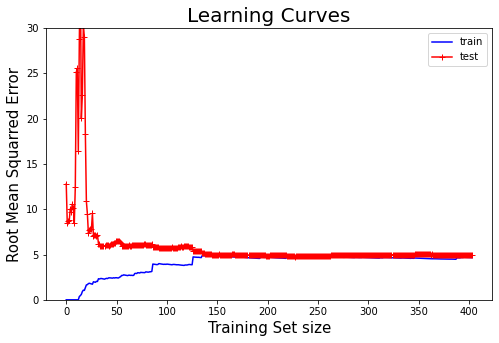

In [63]:
X, y = boston.data, boston.target

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Learning Curve for Polynomial Model

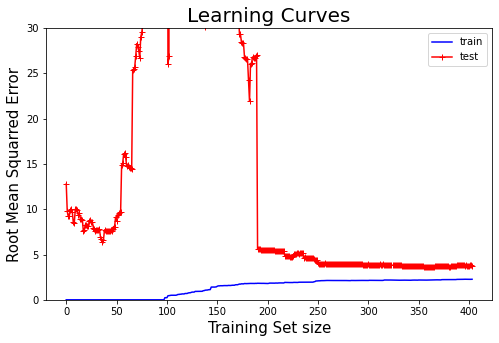

In [64]:
X, y = boston.data, boston.target
X_b = np.c_[np.ones(shape=(X.shape[0], 1)), X]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_scaled)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y)

# Ridge Regression with closed form solution

In [65]:
X, y = boston.data, boston.target

ridge_reg = Ridge(alpha=1.0, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [66]:
X_predict = X[0]
y_hat = ridge_reg.predict([X_predict])
y_hat, y[0]

(array([30.25311604]), 24.0)

# Ridge Regression with SGD

In [67]:
X, y = boston.data, boston.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X_scaled, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [68]:
X_predict = X_scaled[0]
y_hat = sgd_reg.predict([X_predict])
y_hat, y[0]

(array([30.25620317]), 24.0)

# Lasso (closed form solution)

In [69]:
X, y = boston.data, boston.target

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
X_predict = X[0]
y_hat = lasso_reg.predict([X_predict])
y_hat, y[0]

(array([30.99753918]), 24.0)

# Lasso (SGD)

In [71]:
X, y = boston.data, boston.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X_scaled, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [72]:
X_predict = X_scaled[0]
y_hat = sgd_reg.predict([X_predict])
y_hat, y[0]

(array([30.27702512]), 24.0)

# Elastic Net

In [73]:
X, y = boston.data, boston.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_scaled, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
X_predict = X_scaled[0]
y_hat = elastic_net.predict([X_predict])
y_hat, y[0]

(array([30.35210764]), 24.0)

# Early Stopping

In [75]:
# Data
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
  )

# Pipeline for Polynomial-Standard Scaler
poly_scaler = Pipeline(
    [
     ("poly_features", PolynomialFeatures(degree=2, include_bias=False)), 
     ("std_scaler", StandardScaler())
    ]
  )
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

# Model
sgd_reg = SGDRegressor(
    penalty=None, 
    tol=-np.infty, 
    max_iter=1, 
    warm_start=True, 
    learning_rate="constant", 
    eta0=0.0005, 
    random_state=42
  )

Model Training

In [76]:
min_val_error = float("inf")
best_epoch, best_model = None, None

for epoch in tqdm(range(1000), total=1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_test_preds = sgd_reg.predict(X_test_poly_scaled)
  y_test_error = mean_squared_error(y_true=y_test, y_pred=y_test_preds)
  if y_test_error < min_val_error:
    min_val_error = y_test_error
    best_epoch, best_model = epoch, clone(sgd_reg)

100%|██████████| 1000/1000 [00:02<00:00, 469.22it/s]


Fitting Best Model

In [77]:
best_epoch, best_model

(326,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [78]:
best_model.warm_start = False
best_model.max_iter = best_epoch
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=326,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [79]:
best_model.fit(X_train_poly_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=326,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

Predictions

In [80]:
X_predict = X_train_poly_scaled[0]
y_hat = best_model.predict([X_predict])
y_hat, y_train[0]

(array([11.36045392]), 12.0)

# Logistic Regression

In [81]:
iris = load_iris()
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [82]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X[:, 3:].reshape(-1, 1), (y==2).astype(np.int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

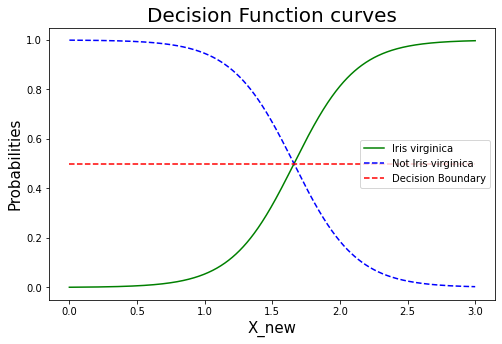

In [83]:
X_new = np.linspace(start=0, stop=3, num=1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_preds = log_reg.predict(X_new)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
ax.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

ax.set_xlabel("X_new", size=15)
ax.set_ylabel("Probabilities", size=15)
ax.set_title("Decision Function curves", size=20)

ax.plot([0.0, 3.0], [0.5, 0.5], "r--", label="Decision Boundary")

plt.legend()
plt.show()

# Softmax Regression

In [84]:
iris = load_iris()
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [85]:
softmax_reg = LogisticRegression(
    multi_class="multinomial", 
    solver="lbfgs", 
    C=10, 
    max_iter=500
  )
softmax_reg.fit(X[:, (2, 3)], y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
softmax_reg.predict([[5, 2]])

array([2])

In [87]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])